# Holocene Ice Analysis

### Introduction

The purpose of this notebook is to analyze the dynamics of the climate over the course of the Holocene at either end of the globe using ice core records from Greenland and Antarctica. Proxies for temperature will be used wherever possible in the form of oxygen isotope data (preferred) or hydrogen isotope data. Inferred temperature will be used if no other options are available.

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import ammonyte as amt
import seaborn as sns
import pandas as pd
import matplotlib.transforms as transforms

from pylipd.lipd import LiPD

/Users/alexjames/miniconda3/envs/ammonyte/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#We suppress warnings for these notebooks for presentation purposes. Best practice is to not do this though.
import warnings
warnings.filterwarnings('ignore')

In [3]:
lipd_path = '../data/8k_ice'

all_files = LiPD()

if __name__=='__main__':
    all_files.load_from_dir(lipd_path)

record_names = all_files.get_all_dataset_names()

Loading 8 LiPD files


  0%|                                                                                                                                                                                                                        | 0/8 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 78.30it/s]

Loaded..


In [4]:
series_list = []

# We specify the indices of interest in each dataframe by hand here

index_dict = {
    'GRIP.GRIP.1992' : 'd18O',
    'Renland.Johnsen.1992' : 'd18O',
    'EDML.Stenni.2010' : 'bagd18O',
    'EPICADomeC.Stenni.2010' : 'bagd18O',
    'Vostok.Vimeux.2002' : 'temperature',
    'GISP2.Grootes.1997' : 'd18O',
    'NGRIP.NGRIP.2004' : 'd18O',
    'TALDICE.Mezgec.2017' : 'd18O',
}

for record in record_names:
    d = LiPD()
    d.load(f'{lipd_path}/{record}.lpd')
    df = d.get_timeseries_essentials()
    row = df[df['paleoData_variableName']==index_dict[record]][df['time_variableName']=='age']
    lat = row['geo_meanLat'].to_numpy()[0]
    lon = row['geo_meanLon'].to_numpy()[0]
    elevation = row['geo_meanElev'].to_numpy()[0]
    value = row['paleoData_values'].to_numpy()[0]
    value_name = row['paleoData_variableName'].to_numpy()[0]
    value_unit = row['paleoData_units'].to_numpy()[0]
    time = row['time_values'].to_numpy()[0]
    time_unit = row['time_units'].to_numpy()[0]
    time_name = row['time_variableName'].to_numpy()[0]
    label = row['dataSetName'].to_numpy()[0]
    geo_series = pyleo.GeoSeries(time=time,
                                 value=value,
                                 lat=lat,
                                 lon=lon,
                                 elevation=elevation,
                                 time_unit=time_unit,
                                 time_name=time_name,
                                 value_name=value_name,
                                 value_unit=value_unit,
                                 label=label,
                                 archiveType='ice')
    series_list.append(geo_series)

geo_ms = pyleo.MultipleGeoSeries(series_list)

Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.06it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.89it/s]

Loaded..
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.68it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.57it/s]

Loaded..


Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.62it/s]

Loaded..


NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.03it/s]

Loaded..
NaNs have been detected and dropped.
Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 121.90it/s]

Loaded..


Time axis values sorted in ascending order
Loading 1 LiPD files


  0%|                                                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 101.34it/s]

Loaded..
NaNs have been detected and dropped.
Time axis values sorted in ascending order


In [5]:
greenland_ms_list = []
antarctica_ms_list = []

for series in geo_ms.series_list:
    if series.lat > 0:
        series.time_unit = 'Years BP'
        greenland_ms_list.append(series)
    else:
        series.time_unit = 'Years BP'
        antarctica_ms_list.append(series)
        

In [6]:
end_time = 10000

Greenland analysis

In [7]:
color_list = sns.color_palette('colorblind')

(<Figure size 640x480 with 5 Axes>,
 {0: <Axes: ylabel='d18O [permil]'>,
  1: <Axes: ylabel='d18O [permil]'>,
  2: <Axes: ylabel='d18O [permil]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  'x_axis': <Axes: xlabel='Age [Years BP]'>})

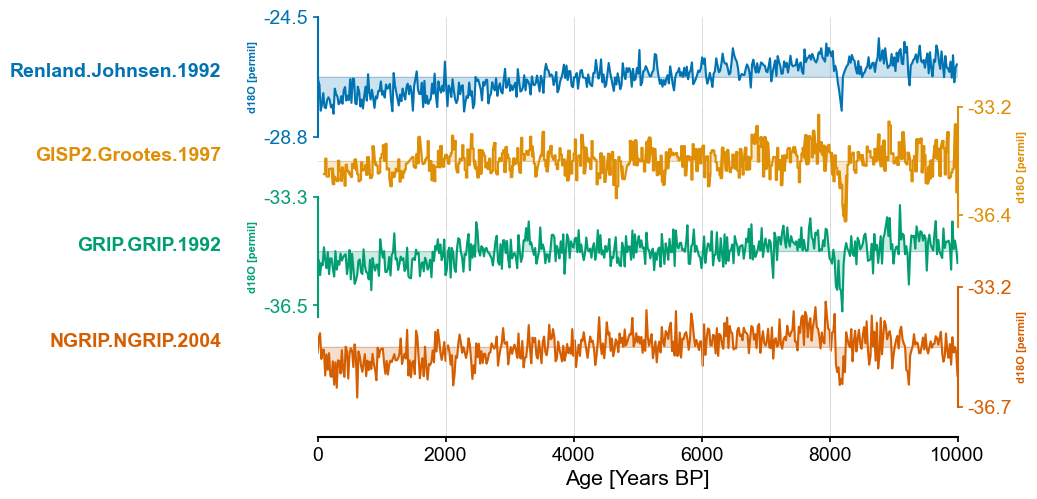

In [8]:
greenland_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in greenland_ms_list])
greenland_ms.stackplot(colors=color_list[:len(greenland_ms.series_list)])

In [9]:
greenland_lp = []
m = 12
tau = 4

for series in greenland_ms.series_list:
    amt_series = amt.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    ).convert_time_unit('Years')
    td = amt_series.embed(m=m,tau=tau)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    greenland_lp.append(lp)

Renland.Johnsen.1992 tau is: 4


Initial density is 0.0155
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0155
Epsilon: 1.1727, Density: 0.0436
Epsilon: 1.1727, Density: 0.0436.


GISP2.Grootes.1997 tau is: 4
Initial density is 0.0129
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0129
Epsilon: 1.1856, Density: 0.0472
Epsilon: 1.1856, Density: 0.0472.


GRIP.GRIP.1992 tau is: 4
Initial density is 0.0180
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0180
Epsilon: 1.1601, Density: 0.0583
Epsilon: 1.1601, Density: 0.0583.


NGRIP.NGRIP.2004 tau is: 4
Initial density is 0.0116
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0116
Epsilon: 1.1918, Density: 0.0408
Epsilon: 1.1918, Density: 0.0408.


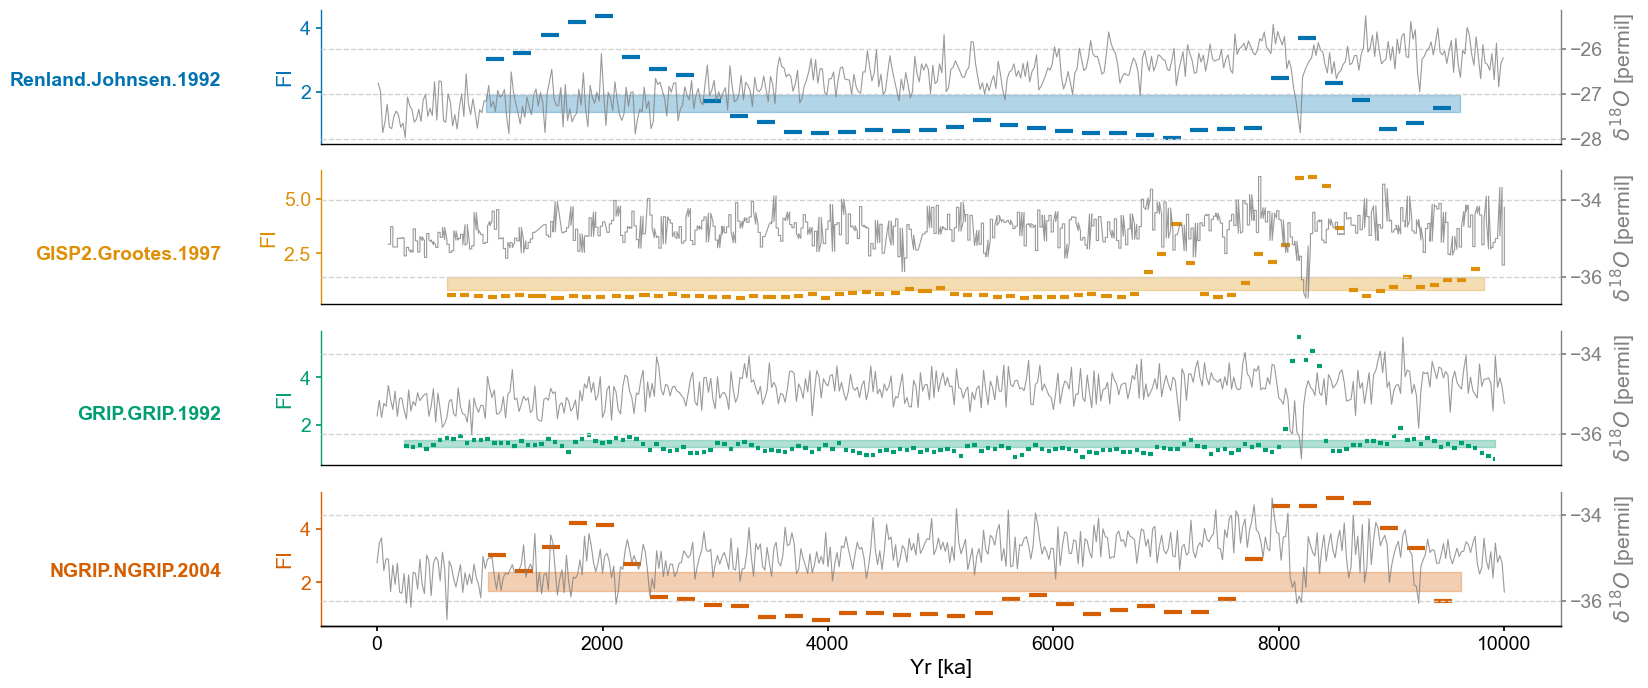

In [10]:
ms = greenland_ms
lp_series_list = greenland_lp

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,8))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'
    
    ax = axes[idx]
    
    ts_smooth = amt.utils.fisher.smooth_series(series=ts,block_size=3)
    upper, lower = amt.utils.sampling.confidence_interval(series=ts,upper=95,lower=5,w=50,n_samples=10000)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.2, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold')
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)



Antarctica analysis

(<Figure size 640x480 with 5 Axes>,
 {0: <Axes: ylabel='bagd18O [permil]'>,
  1: <Axes: ylabel='bagd18O [permil]'>,
  2: <Axes: ylabel='temperature [degC]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  'x_axis': <Axes: xlabel='Age [Years BP]'>})

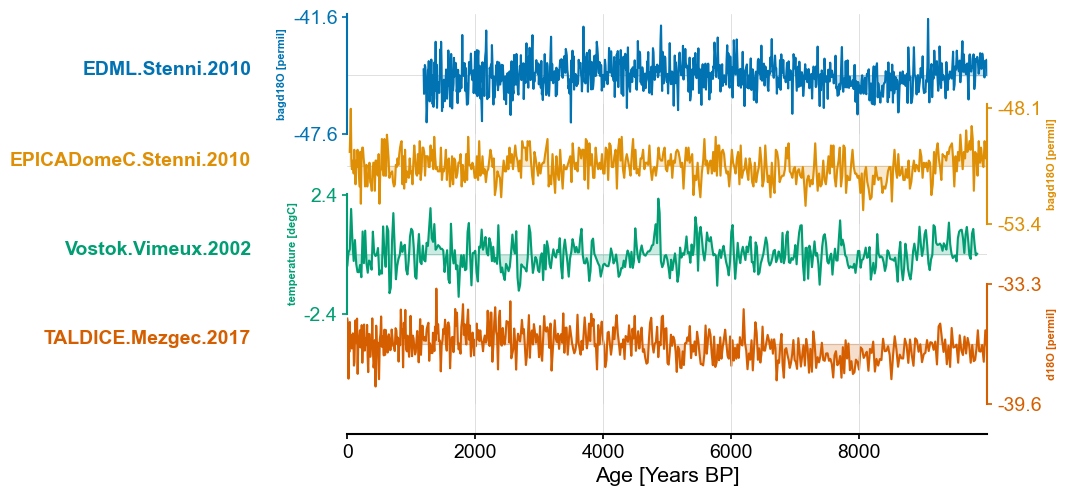

In [11]:
antarctica_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in antarctica_ms_list])
antarctica_ms.stackplot(colors=color_list[:len(antarctica_ms.series_list)])

In [12]:
antarctica_lp = []
m = 12
tau = 3
eps_list= [2.2,2.2,10,2.2]

for idx,raw_series in enumerate(antarctica_ms.series_list):
    
    if not raw_series.is_evenly_spaced:
        series = raw_series.interp()
    else:
        series = raw_series
        
    amt_series = amt.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    ).convert_time_unit('Years')
    td = amt_series.embed(m=m,tau=tau)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=eps_list[idx],target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    antarctica_lp.append(lp)

EDML.Stenni.2010 tau is: 3
Initial density is 0.0338
Initial density is not within the tolerance window, searching...
Epsilon: 2.3619, Density: 0.0569
Epsilon: 2.3619, Density: 0.0569.


EPICADomeC.Stenni.2010 tau is: 3
Initial density is 0.0624
Initial density is not within the tolerance window, searching...
Epsilon: 2.0758, Density: 0.0396
Epsilon: 2.1796, Density: 0.0586
Epsilon: 2.1796, Density: 0.0586.


Vostok.Vimeux.2002 tau is: 3
Initial density is 1.0000
Initial density is not within the tolerance window, searching...
Epsilon: 0.5000, Density: 0.0022
Epsilon: 0.9781, Density: 0.0025
Epsilon: 1.4534, Density: 0.0116
Epsilon: 1.8374, Density: 0.0544
Epsilon: 1.8374, Density: 0.0544.


TALDICE.Mezgec.2017 tau is: 3
Initial density is 0.0239
Initial density is not within the tolerance window, searching...
Epsilon: 2.4612, Density: 0.0550
Epsilon: 2.4612, Density: 0.0550.


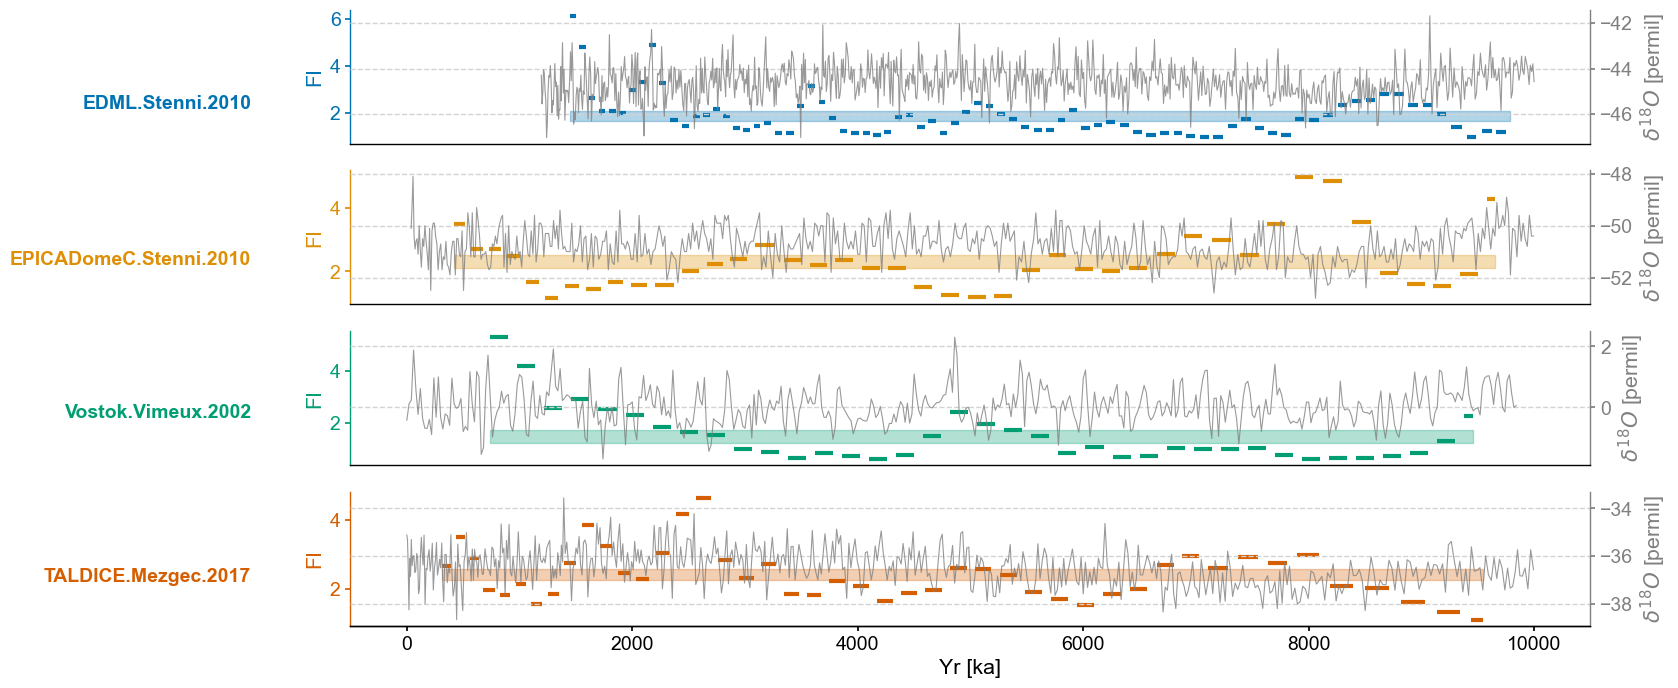

In [13]:
ms = antarctica_ms
lp_series_list = antarctica_lp

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,8))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'
    
    ax = axes[idx]
    
    ts_smooth = amt.utils.fisher.smooth_series(series=ts,block_size=3)
    upper, lower = amt.utils.sampling.confidence_interval(series=ts,upper=95,lower=5,w=50,n_samples=10000)
    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.2, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold')
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
